In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# DSCI Project Individual Portion
A real data science project from a UBC research group is researching how people play video games through recording players' actions when playing on a MineCraft server. However, due to limited resources, the study requires a narrower recruitment team of players that would provide them a greater amount of data. Hence, this page investigate in the narrower scope; more specifically, investigate traits players obtain that are most likely to contribute a large amount of data.

## Data Description

### 1. "players.csv" is dataset with 7 variables, each describing each players (one row per unique player) with higher-level attributes.
|Variable Name |Type|Meaning|
|:------------:|:--:|:-----:|
|`experience`  |chr |Experience with MineCraft (beginner, regular, amateur, pro, veteran ordered in increasing experience)|
|`subscribe`   |lgl |Subscribe to the Newspaper or not (True/False)|
|`hashedEmail` |chr |Registration email|
|`played_hours`|dbl |Hours played on server (hours)|
|`name`        |chr |Player's name|
|`gender`      |chr |Player's gender|
|`age`         |dbl |Player's age|

#### Overview of "player_data.csv" Table

In [4]:
player_data <- read_csv("data/players.csv")
head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Summary Table for Quantitative Variables: `played_hours` and `age`

In [10]:
summarized_played_hours <- player_data |>
    summarize(variable = "played_hours",
              mean = round(mean(played_hours, na.rm = TRUE), 2),
              sd = round(sd(played_hours, na.rm = TRUE), 2),
              max = round(max(played_hours, na.rm = TRUE), 2),
              min = round(min(played_hours, na.rm = TRUE), 2),
              num_missing = sum(is.na(played_hours)))
summarized_age <- player_data |>
    summarize(variable = "Age",
              mean = round(mean(Age, na.rm = TRUE), 2),
              sd = round(sd(Age, na.rm = TRUE), 2),
              max = round(max(Age, na.rm = TRUE), 2),
              min = round(min(Age, na.rm = TRUE), 2),
              num_missing = sum(is.na(Age)))
summarized_played_hours
summarized_age

variable,mean,sd,max,min,num_missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
played_hours,5.85,28.36,223.1,0,0


variable,mean,sd,max,min,num_missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Age,21.14,7.39,58,9,2


#### Overall Summary Table Basing on `experience`
`experience` provides a clear structure of the dataset with enough samples for each category.

In [12]:
summarized_player_data <- player_data |>
    group_by(experience) |>
    summarize(num_players = n(),
              num_subscribed = sum(subscribe, na.rm = TRUE),
              avg_played_hours = mean(played_hours, na.rm = TRUE), 
              max_played_hours = round(max(played_hours, na.rm = TRUE), 2), 
              min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
              sd_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
              avg_age = round(mean(Age, na.rm = TRUE), 2), 
              max_age = max(Age, na.rm = TRUE), 
              min_age = min(Age, na.rm = TRUE),
              sd_age = round(sd(Age, na.rm = TRUE), 2))
summarized_player_data

experience,num_players,num_subscribed,avg_played_hours,max_played_hours,min_played_hours,sd_played_hours,avg_age,max_age,min_age,sd_age
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Amateur,63,45,6.0174603,150.0,0,21.99,21.37,57,11,7.59
Beginner,35,27,1.2485714,23.7,0,4.11,21.66,42,17,6.08
Pro,14,10,2.6000000,30.3,0,7.99,16.92,25,9,3.84
Regular,36,29,18.2083333,223.1,0,57.96,22.03,58,10,9.99
Veteran,48,33,0.6479167,12.5,0,1.94,20.96,46,16,6.30


##### Potential Issues with Data
1. Data may contain missing values such as **NA** in `Age` and **"prefer not to say"** in `gender`.
2. The `avg_played_hours` may have no representative of the player if the **time span** for data recordings are too short. For example, if the data is collected during summer, children may have more freetime playing games, while adults are less likely.
3. Due to a **smaller sample**, **outliers** may increase the average by too much, although this may not be the case across most other players in the same category. `Regular` category may be an example with **high standard deviation** in `sd_played_hours`
4. **Bias** in `experience` when self-reporting from players.

### 2. "sessions.csv" is dataset with 5 variables that describes player's states in the session
|Variable Name |Type|Meaning|
|:------------:|:--:|:-----:|
|`hashedEmail`|chr|Regristration email|
|`start_time`|chr|Connect time (in datetime)|
|`end_time`|chr|Disconnect time (in datetime)|
|`original_start_time`|dbl|Connect time (in Unix timestamp)|
|`original_end_time`|dbl|Disconnect time (in Unix timestamp)|

The **Unix timestamp** make calculation of total time spend on the server convient to calculate, with the formula (`original_end_time` - `original_start_time`) milliseconds.

In [15]:
session_data <- read_csv("data/sessions.csv")
head(session_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Summary Table of `original_start_time` and `original_end_time`

In [30]:
summary_original_start_time <- session_data |>
    select(original_start_time) |>
    summarize(variable = "original_start_time",
              num_session = n(),
              avg_start_time = mean(original_start_time, na.rm = TRUE),
              avg_start_date = as.POSIXct(mean(original_start_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"),

              latest_start_time = max(original_start_time, na.rm = TRUE),
              latest_start_date = as.POSIXct(max(original_start_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"),

              earliest_start_time = min(original_start_time, na.rm = TRUE),
              earliest_start_date = as.POSIXct(min(original_start_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"))
summary_original_start_time

variable,num_session,avg_start_time,avg_start_date,latest_start_time,latest_start_date,earliest_start_time,earliest_start_date
<chr>,<int>,<dbl>,<dttm>,<dbl>,<dttm>,<dbl>,<dttm>
original_start_time,1535,1.719201e+12,2024-06-24 03:55:55,1.72733e+12,2024-09-26 05:53:20,1.7124e+12,2024-04-06 10:40:00


In [31]:
summary_original_end_time <- session_data |>
    select(original_end_time) |>
    summarize(variable = "original_end_time",
              num_session = n(),
              avg_end_time = mean(original_end_time, na.rm = TRUE),
              avg_end_date = as.POSIXct(mean(original_end_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"),

              latest_end_time = max(original_end_time, na.rm = TRUE),
              latest_end_date = as.POSIXct(max(original_end_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"),

              earliest_end_time = min(original_end_time, na.rm = TRUE),
              earliest_end_date = as.POSIXct(min(original_end_time, na.rm = TRUE)/1000, origin = "1970-01-01", tz = "UTC"))
summary_original_end_time

variable,num_session,avg_end_time,avg_end_date,latest_end_time,latest_end_date,earliest_end_time,earliest_end_date
<chr>,<int>,<dbl>,<dttm>,<dbl>,<dttm>,<dbl>,<dttm>
original_end_time,1535,1.719196e+12,2024-06-24 02:25:49,1.72734e+12,2024-09-26 08:40:00,1.7124e+12,2024-04-06 10:40:00


##### Potential Issues with Data
1. Data may contain missing values such as **NA** in `original_end_time`.
2. There are **more session** than unique players, hence the data contains the multiple playing sessions of the same person in which the data fails to present.
3. Data are mostly collected during **summer**. It may not be helpful to predict for another time of the year.
4. Data neglects potential issues with **reconnection** or **network issues**.
5. Mismatch in played time in **session.csv and player.csv**. (shown below)

In [39]:
session_played_time <- session_data |>
    filter(hashedEmail == "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf") |>
    select(original_start_time, original_end_time) |>
    mutate(diff = original_end_time - original_start_time) |>
    summarize(session_played_time = sum(diff)*2.7778e-7)
player_played_time <- player_data |>
    filter(hashedEmail == "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf") |>
    select(played_hours)
session_played_time
player_played_time

session_played_time
<dbl>
202.7794


played_hours
<dbl>
223.1


## Research Question
The **broad question** I will address is: what "kinds" of players are likely to contribute a large amount of data. <br>
A derived narrower **research question** is: How is `experience`, `subscribe`, and `age ` effect the `played_hour` of players present in player_data.csv. <br>
Each variables are essential traits for players that may wrangle large amount of data:
- `experiment` shows what player is more likely to play at which stage.
- `subscribe` may indicate attention payed to the game. More interest may play more game.
- `Age` can show difference in welcomeness of the game across age groups. <br>

`gender` may not be an appropriate indicator, since each group can have a large difference in sample number.

### Wrangling Plan
The aim of the wrangling is to put all variables into knn-regression model in predicting played hours.
1. Remove distracting columns like `hashedEmail` or `name`.
2. Remove rows with **NA**
3. Use pivot_longer to turn `experience`, `subscribe` into categories where the value is 1 if it is in the correct category, 0 otherwise. <br>
- Wrangling the data in 1 and 0 separated by category makes each of the original quanlitative values into quantitative values, allowing regression to take place.
- Wrangling the data without `hashedEmail` and `name` allows minimization of distraction since this project neglect data from session.csv.

## Data Analysis and Visualization
### Simple wrangling of player_data.csv
Since visualization can utiliza categorical values, the conversion of categorical to quantitative data can be neglected until predictive analysis.

In [6]:
tidy_player_data <- player_data |>
    select(experience, subscribe, Age, played_hours)

### Relationship between `experience` and `avg_played_hours`

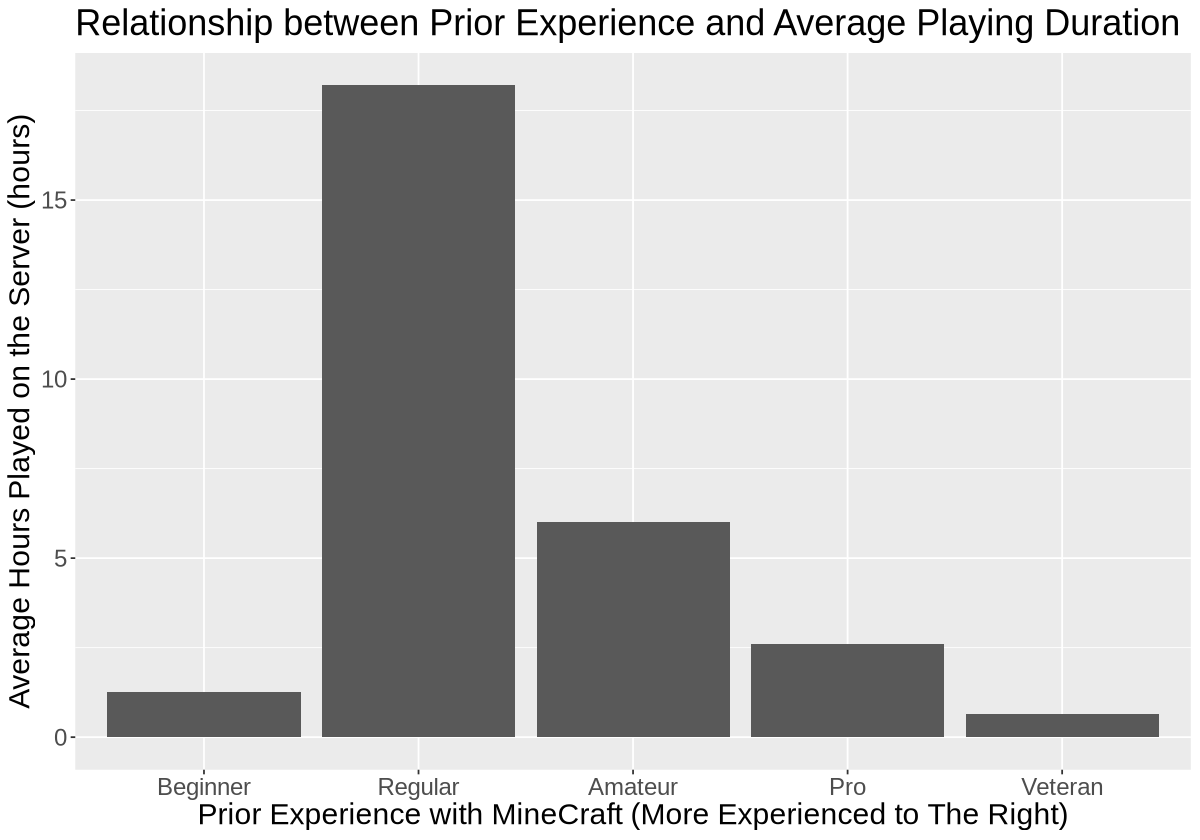

In [65]:
options(repr.plot.height = 7, repr.plot.width = 10)

experience_vs_played_hours <- tidy_player_data |>
    mutate(experience = factor(experience, levels = c("Beginner", "Regular", "Amateur", "Pro", "Veteran"))) |>
    filter(experience != "NA") |>
    group_by(experience) |>
    summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))|>
    ggplot(aes(x = experience, y = avg_played_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Prior Experience with MineCraft (More Experienced to The Right)",
         y = "Average Hours Played on the Server (hours)",
         title = "Relationship between Prior Experience and Average Playing Duration")+
    theme(text = element_text(size = 18))
experience_vs_played_hours

#### Observation:
Prior experience is directing influencing the playing time. Counter intuitively, most average played time (y-axis) occurs at category Regular and Amateur (x-axis), rather than more experienced group. This creates a non-linear relationship that suggest more/less experience may lead to more play time.

### Relationship between `subscribe` and `avg_played_hours`

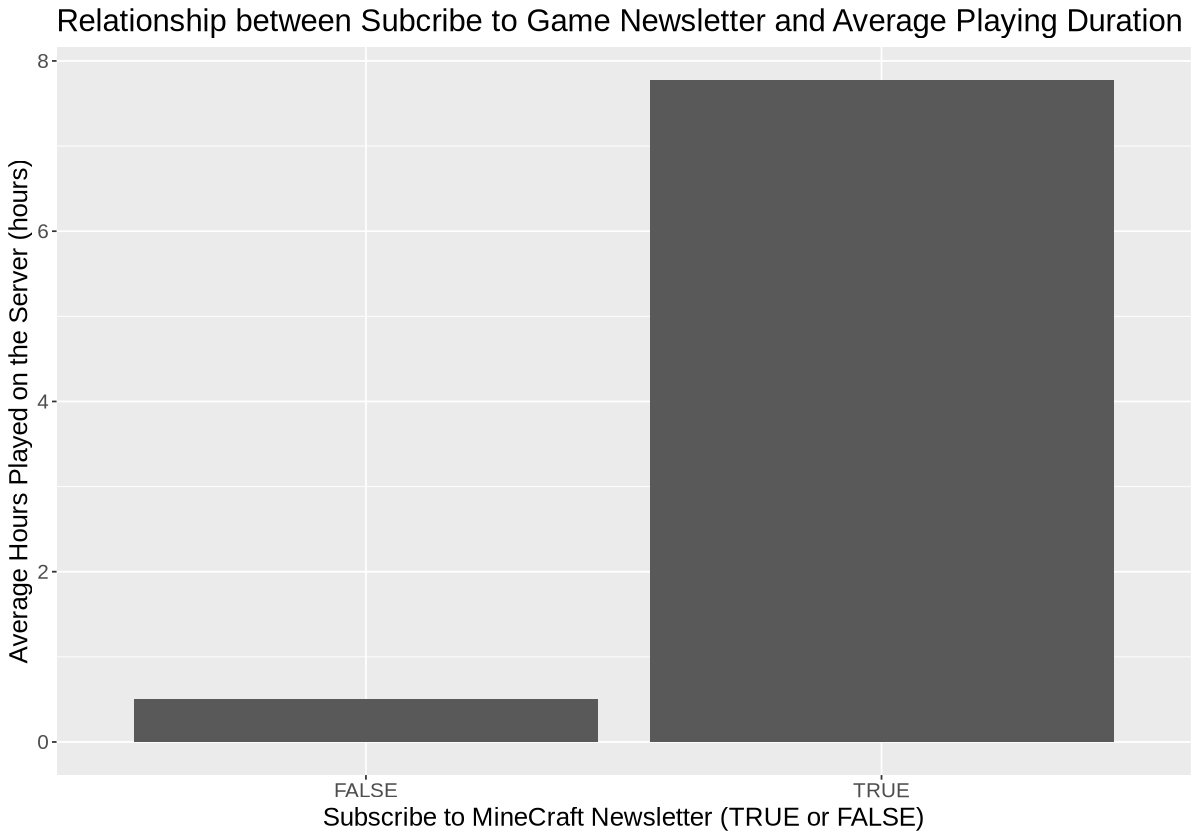

In [63]:
options(repr.plot.height = 7, repr.plot.width = 10)

subscribe_vs_played_hours <- tidy_player_data |>
    group_by(subscribe) |>
    summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))|>
    ggplot(aes(x = subscribe, y = avg_played_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscribe to MineCraft Newsletter (TRUE or FALSE)",
         y = "Average Hours Played on the Server (hours)",
         title = "Relationship between Subcribe to Game Newsletter and Average Playing Duration") +
    theme(text = element_text(size = 15.5))
subscribe_vs_played_hours

#### Observation:
More average playing hour (y-axis) if people are subscribed to Newsletter (x-axis)

### Relationship between `Age` and `played_hours`

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


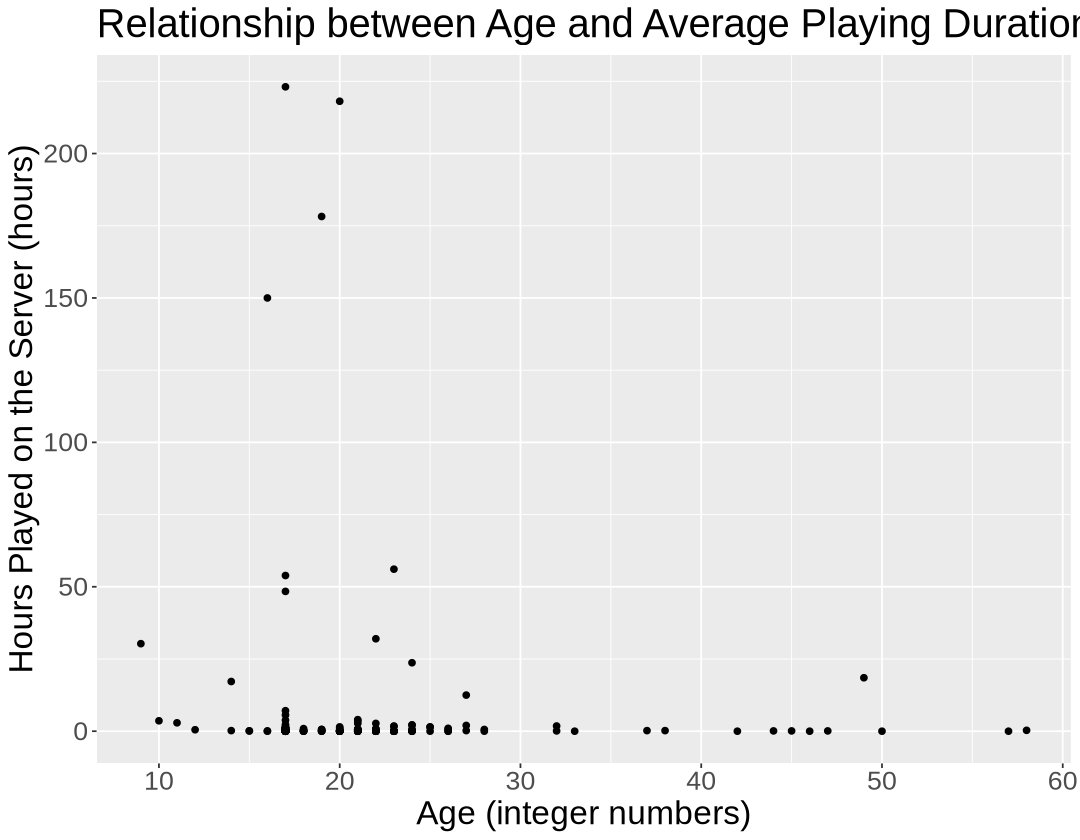

In [66]:
options(repr.plot.height = 7, repr.plot.width = 9)

age_vs_played_hours <- tidy_player_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age (integer numbers)",
         y = "Hours Played on the Server (hours)",
         title = "Relationship between Age and Average Playing Duration")+
    theme(text = element_text(size = 20))
age_vs_played_hours

#### Observation:
The highest playing durations happens in the range of 15 to 20 years old which are mostly teenagers. However, most data points have 0.0 hours of playing time. This means that one trait will not be enough to determine the "kind" of people who played the most, hence involving other variables.

## Methods and Plan
The method I would choose to use is knn-regression model. 
1. Knn-regression predicts on a continuous variable, `played_hours` in this case. Hence knn-classification is in appropriate. Linear regression is in appropriate as some variables are clearly non-linear such as `Age` which peaks in the middle.
2. Assumptions include:
   - Categorical values are independent (beginner and pro are two independent variables)
   - Scaling is reasonable (Age has much larger scale than other quanlitative variables)
   - Balanced data distribution
   - The closer the points, the more related
3. Limitations include:
   - Fail to predict out of range values
   - Outliers may dominate the predicting result
   - Categorical values like types in `experience` may be correlated
4. I select the model based on the results of cross validation. More specifically, lower RMSPE on validation data, better the model.
5. Quanlitative variables are turned into 0s and 1s, where as Age is centered and scaled within standard deviation of 1. Moreover, with a random seed, I will split the data with prop = 0.8, where the greater part goes to training and the other testing. I will find the best k value by selecting k from 5, 7, ..., 21. I will also do 5-fold cross validation to find the best trained model.